# HR - Attrition Analytics

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

This dataset is taken from kaggle https://www.kaggle.com/ludobenistant/hr-analytics

Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

In [42]:
import pandas as pd

In [43]:
hr_df = pd.read_csv('./data/HR_comma_sep.csv')

In [44]:
hr_df.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [45]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [46]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [47]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Satisfaction Level Vs Left

In [48]:
import matplotlib.pyplot as plt
import seaborn as sn

In [49]:
left = hr_df[hr_df.left == 1]
not_left = hr_df[hr_df.left == 0]

In [50]:
left.shape

(3571, 10)

In [51]:
not_left.shape

(11428, 10)

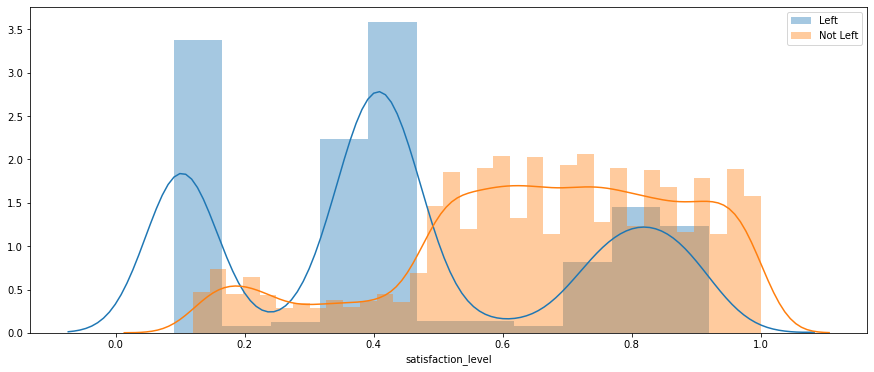

In [52]:
plt.figure(figsize=(15,6))
sn.distplot( left['satisfaction_level'], label = 'Left')
sn.distplot( not_left['satisfaction_level'], label = 'Not Left')
plt.legend();

### Last Evaluation Vs Left

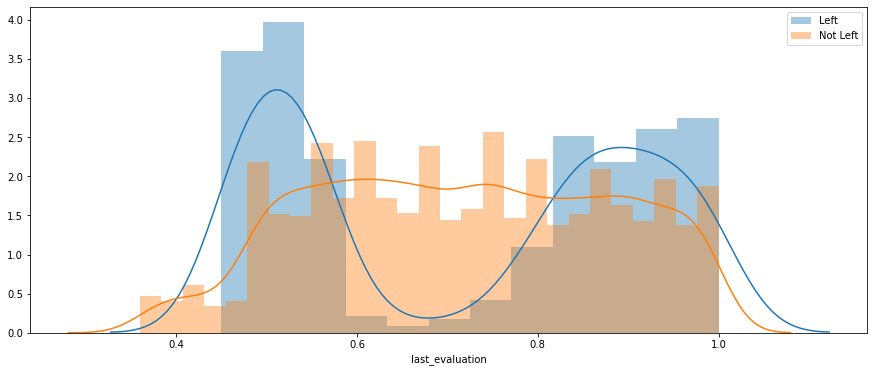

In [53]:
plt.figure(figsize=(15,6))
sn.distplot( left['last_evaluation'], label = 'Left')
sn.distplot( not_left['last_evaluation'], label = 'Not Left')
plt.legend();

In [54]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

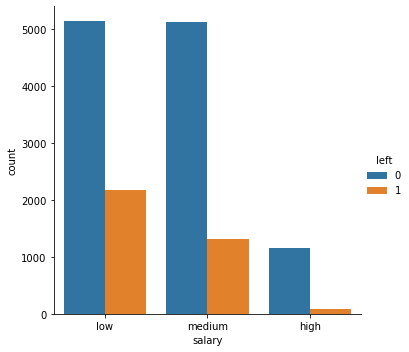

In [55]:
sn.catplot( data = hr_df,
            x = 'salary',
            hue = 'left',
            kind = 'count' );

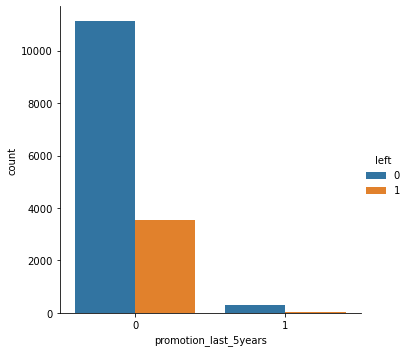

In [56]:
sn.catplot( data = hr_df,
            x = 'promotion_last_5years',
            hue = 'left',
            kind = 'count' );

### Time Spend Company Vs Left

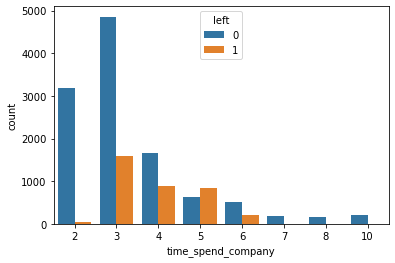

In [57]:
sn.countplot( data = hr_df,
              x = 'time_spend_company',
              hue = 'left' );

In [58]:
pd.crosstab( hr_df.time_spend_company, 
             hr_df.left,
             normalize = 'index')

left,0,1
time_spend_company,,
2,0.983662,0.016338
3,0.753841,0.246159
4,0.651936,0.348064
5,0.434487,0.565513
6,0.708914,0.291086
7,1.000000,0.000000
8,1.000000,0.000000
10,1.000000,0.000000


In [59]:
hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [61]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

### Encoding Categorical Features

- OHE - One Hot Encoding 
- Dummy Variable Creation

In [62]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['dept', 'salary'] )

In [63]:
hr_encoded_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
hr_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept_IT                14999 non-null  uint8  
 9   dept_RandD             14999 non-null  uint8  
 10  dept_accounting        14999 non-null  uint8  
 11  dept_hr                14999 non-null  uint8  
 12  dept_management        14999 non-null  uint8  
 13  dept_marketing         14999 non-null  uint8  
 14  dept_product_mng       14999 non-null  uint8  
 15  de

### Setting X and Y Variables

In [65]:
hr_encoded_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept_IT', 'dept_RandD', 'dept_accounting',
       'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng',
       'dept_sales', 'dept_support', 'dept_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [66]:
X_features = list(hr_encoded_df.columns)

In [67]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [68]:
X_features.remove('left')

In [69]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [70]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

In [71]:
X[0:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [72]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [75]:
X_train.shape

(11999, 20)

In [76]:
X_test.shape

(3000, 20)

### Build a Model: V1

Logistic Regression Model - Sigmoid function

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [79]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

In [80]:
logreg_v1.intercept_

array([-0.43333931])

In [81]:
logreg_v1.coef_

array([[-3.98943943,  0.73873499, -0.29983092,  0.00447247,  0.26755044,
        -1.52590437, -1.32314298, -0.10731903, -0.49233668,  0.13250934,
         0.3251929 , -0.42887675,  0.02596327, -0.08657487,  0.03863425,
         0.07297081,  0.13040165, -1.20528878,  0.68193894,  0.13391472]])

In [82]:
dict( zip( X_features, logreg_v1.coef_[0] ) )

{'satisfaction_level': -3.989439431385101,
 'last_evaluation': 0.7387349893465284,
 'number_project': -0.29983092148988116,
 'average_montly_hours': 0.0044724736475718185,
 'time_spend_company': 0.2675504360259739,
 'Work_accident': -1.5259043733542392,
 'promotion_last_5years': -1.3231429845013352,
 'dept_IT': -0.10731902797462946,
 'dept_RandD': -0.4923366805605127,
 'dept_accounting': 0.13250933783827695,
 'dept_hr': 0.32519289535703,
 'dept_management': -0.42887675367803185,
 'dept_marketing': 0.025963270641100638,
 'dept_product_mng': -0.08657487356438291,
 'dept_sales': 0.0386342481222818,
 'dept_support': 0.07297081257342987,
 'dept_technical': 0.13040164557734965,
 'salary_high': -1.205288783815538,
 'salary_low': 0.6819389404047018,
 'salary_medium': 0.13391471774106556}

### Predict on Test Set

- p(y) >= 0.5,  y = 1 (L)
- p(y) < 0.5, y = 0 (NL)

In [83]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [84]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

In [85]:
y_logreg_v1[0:10]

,actual,predicted
10155,0,0
11688,0,0
12598,1,0
12192,1,0
8678,0,1
8217,0,0
4670,0,0
12086,1,1
5235,0,0
4189,0,0


In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_logreg_v1.actual, y_logreg_v1.predicted)

0.7866666666666666

### Evaluating the model

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
cm_v1 = confusion_matrix( y_logreg_v1.actual, 
                          y_logreg_v1.predicted,
                          [1,0] )

/opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [91]:
cm_v1

array([[ 257,  493],
       [ 147, 2103]])

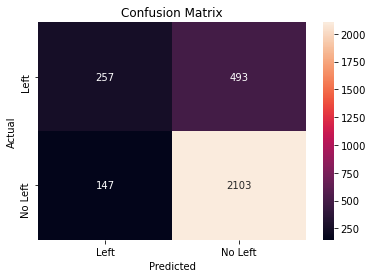

In [93]:
sn.heatmap( cm_v1, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [94]:
(256/(256+497)) # Recall

0.3399734395750332

In [95]:
(256/(256+147)) # Precision

0.6352357320099256

In [98]:
from sklearn.metrics import classification_report, precision_score, recall_score

In [99]:
precision_score( y_logreg_v1.actual, y_logreg_v1.predicted)

0.6361386138613861

In [100]:
recall_score( y_logreg_v1.actual, y_logreg_v1.predicted)

0.3426666666666667

In [97]:
print( classification_report( y_logreg_v1.actual,
                              y_logreg_v1.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2250
           1       0.64      0.34      0.45       750

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.76      3000



### KNN Model

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn_v1 = KNeighborsClassifier(n_neighbors = 10)

In [104]:
knn_v1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [106]:
knn_pred = knn_v1.predict(X_test)

In [107]:
cm_knn = confusion_matrix(y_test, knn_pred, [1,0])

/opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


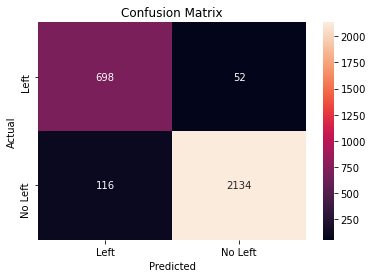

In [108]:
sn.heatmap( cm_knn, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [109]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2250
           1       0.86      0.93      0.89       750

    accuracy                           0.94      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.94      0.94      3000



In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
knn_v1 = KNeighborsClassifier()

In [113]:
params = { "n_neighbors": [10, 15, 20, 25, 30],
           "weights": ['uniform', 'distance']}

In [114]:
knn_grid = GridSearchCV(knn_v1,
                        param_grid=params,
                        cv=10,
                        scoring='recall')

In [115]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [116]:
knn_grid.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [117]:
knn_grid.best_score_

0.9695198356013333

In [ ]:
pd.DataFrame(knn_grid.cv_results_)

In [ ]:
best_knn_v2 = knn_grid.best_estimator_

### Building a Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_v2 = DecisionTreeClassifier( max_depth = 5 )
### Max Depth is called hyperparameter

In [ ]:
tree_v2.fit( X_train, y_train )

In [ ]:
y_tree_pred = tree_v2.predict( X_test )

In [ ]:
cm_tree_v2 = confusion_matrix( y_test,
                               y_tree_pred,
                               [1,0] )

In [ ]:
sn.heatmap( cm_tree_v2, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [ ]:
print( classification_report( y_test,
                       y_tree_pred ) )

In [ ]:
features_df = pd.DataFrame( { "features": X_features,
                              "importance": tree_v2.feature_importances_ } )

In [ ]:
features_df.sort_values("importance", ascending = False)

### Visualizing Decision Tree

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize = (50, 12))
plot_tree(tree_v2,
          feature_names = X_features,
          class_names = ['Not Left', 'Left'],
          filled = True,
          fontsize = 10);
plt.savefig('tree.png')

In [ ]:
from IPython import display

In [ ]:
display.Image("tree.png")

![MY Tree](./tree.png)

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = { "max_depth": range(3,10),
           "criterion": ['gini', 'entropy']}

In [ ]:
grid_v3 = GridSearchCV( DecisionTreeClassifier(),
                        param_grid = params,
                        cv = 10,
                        scoring = 'recall')

In [ ]:
grid_v3.fit( X_train, y_train )

In [ ]:
grid_v3.best_params_

In [ ]:
grid_v3.best_score_

In [ ]:
best_model = grid_v3.best_estimator_

In [ ]:
grid_v3.cv_results_

### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_v1 = RandomForestClassifier(n_estimators = 100,
                               max_depth = 10,
                               max_features = 0.2,
                               max_samples = 0.4,
                               criterion = 'gini')

In [ ]:
rf_v1.fit(X_train, y_train)

In [ ]:
rf_pred_v1 = rf_v1.predict(X_test)

In [ ]:
cm_rf = confusion_matrix( y_test, rf_pred_v1, [1,0])

In [ ]:
sn.heatmap( cm_rf, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [ ]:
print(classification_report(y_test, rf_pred_v1))

In [ ]:
rf_v2 = RandomForestClassifier()

In [ ]:
params = { 'n_estimators': [50, 100, 200],
           'max_depth': [5, 10],
           'max_features': [0.2, 0.4],
           'max_samples': [0.4, 0.6],
           'criterion': ['gini', 'entropy'] }

In [ ]:
rf_grid = GridSearchCV(rf_v2,
                       param_grid=params,
                       cv = 10,
                       scoring = 'f1')

In [ ]:
rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
rf_grid.best_estimator_

In [ ]:
features_df = pd.DataFrame( { "features": X_features,
                              "importance": rf_grid.best_estimator_.feature_importances_ } )

In [ ]:
features_df = features_df.sort_values('importance', ascending=False)

In [ ]:
features_df['cumsum'] = features_df.importance.cumsum()

In [ ]:
features_df

### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier( n_neighbors = 10, weights = 'distance' )

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
params = { "n_neighbors": [5, 10, 15, 20],
           "weights" : ['uniform', 'distance']}

In [ ]:
knn_grid = GridSearchCV( KNeighborsClassifier(),
                         param_grid = params,
                         cv = 10,
                         scoring = 'recall')

In [ ]:
knn_grid.fit(X_train, y_train)

In [ ]:
knn_grid.best_params_

In [ ]:
knn_grid.best_score_

In [ ]:
knn_grid.best_estimator_